<a href="https://colab.research.google.com/github/191201-Hanshitha/Major_Project/blob/main/Copy_of_my_Copy_of_Final_Major_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import warnings
warnings.filterwarnings("ignore")

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,precision_recall_fscore_support
from sklearn.metrics import f1_score,roc_auc_score
from sklearn.ensemble import RandomForestClassifier,ExtraTreesClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import StackingClassifier
import xgboost as xgb
from xgboost import plot_importance

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/MachineLearningCSV/MachineLearningCVE/Wednesday-workingHours.pcap_ISCX.csv', skipinitialspace=True)

In [ ]:
df.shape

(692703, 79)

In [ ]:
df

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,80,38308,1,1,6,6,6,6,6.000000,0.000000,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
1,389,479,11,5,172,326,79,0,15.636364,31.449238,...,32,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
2,88,1095,10,6,3150,3150,1575,0,315.000000,632.561635,...,32,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
3,389,15206,17,12,3452,6660,1313,0,203.058823,425.778474,...,32,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
4,88,1092,9,6,3150,3152,1575,0,350.000000,694.509719,...,32,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
692698,53,32215,4,2,112,152,28,28,28.000000,0.000000,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
692699,53,324,2,2,84,362,42,42,42.000000,0.000000,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
692700,58030,82,2,1,31,6,31,0,15.500000,21.920310,...,32,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
692701,53,1048635,6,2,192,256,32,32,32.000000,0.000000,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN


In [ ]:
df.columns

Index(['Destination Port', 'Flow Duration', 'Total Fwd Packets',
       'Total Backward Packets', 'Total Length of Fwd Packets',
       'Total Length of Bwd Packets', 'Fwd Packet Length Max',
       'Fwd Packet Length Min', 'Fwd Packet Length Mean',
       'Fwd Packet Length Std', 'Bwd Packet Length Max',
       'Bwd Packet Length Min', 'Bwd Packet Length Mean',
       'Bwd Packet Length Std', 'Flow Bytes/s', 'Flow Packets/s',
       'Flow IAT Mean', 'Flow IAT Std', 'Flow IAT Max', 'Flow IAT Min',
       'Fwd IAT Total', 'Fwd IAT Mean', 'Fwd IAT Std', 'Fwd IAT Max',
       'Fwd IAT Min', 'Bwd IAT Total', 'Bwd IAT Mean', 'Bwd IAT Std',
       'Bwd IAT Max', 'Bwd IAT Min', 'Fwd PSH Flags', 'Bwd PSH Flags',
       'Fwd URG Flags', 'Bwd URG Flags', 'Fwd Header Length',
       'Bwd Header Length', 'Fwd Packets/s', 'Bwd Packets/s',
       'Min Packet Length', 'Max Packet Length', 'Packet Length Mean',
       'Packet Length Std', 'Packet Length Variance', 'FIN Flag Count',
       'SYN Flag Co

In [ ]:
df['Label'].value_counts()

BENIGN              440031
DoS Hulk            231073
DoS GoldenEye        10293
DoS slowloris         5796
DoS Slowhttptest      5499
Heartbleed              11
Name: Label, dtype: int64

In [ ]:
# Z-score normalization
features = df.dtypes[df.dtypes != 'object'].index
df[features] = df[features].apply(
    lambda x: (x - x.mean()) / (x.std()))
# Fill empty values by 0
df = df.fillna(0)

In [ ]:
labelencoder = LabelEncoder()
df.iloc[:, -1] = labelencoder.fit_transform(df.iloc[:, -1])

In [ ]:
df['Label'].value_counts()

0    440031
2    231073
1     10293
4      5796
3      5499
5        11
Name: Label, dtype: int64

In [ ]:
# retain the minority class instances and sample the majority class instances
df_minor = df[(df['Label']==5)|(df['Label']==4)|(df['Label']==3)]
df_major = df.drop(df_minor.index)

In [ ]:
X = df_major.drop(['Label'],axis=1) 
y = df_major.iloc[:, -1].values.reshape(-1,1)
y=np.ravel(y)

In [ ]:
from sklearn.cluster import MiniBatchKMeans
kmeans = MiniBatchKMeans(n_clusters=1000, random_state=0).fit(X)

In [ ]:
klabel=kmeans.labels_
df_major['klabel']=klabel

In [ ]:
df_major['klabel'].value_counts()

11     9376
703    6933
298    6613
252    5889
443    4347
       ... 
710      23
495      19
686      16
481      15
567       1
Name: klabel, Length: 990, dtype: int64

In [ ]:
cols = list(df_major)
cols.insert(78, cols.pop(cols.index('Label')))
df_major = df_major.loc[:, cols]

In [ ]:
df_major

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label,klabel
0,-0.356503,-0.653857,-0.011451,-0.009362,-0.089086,-0.007581,-0.376966,-0.176667,-0.346068,-0.366591,...,-0.131646,-0.100396,-0.14867,-0.104366,-0.579979,-0.105686,-0.58524,-0.57078,0,657
1,-0.336856,-0.654742,0.001932,-0.005298,-0.062153,-0.007438,-0.256055,-0.294156,-0.284940,-0.227513,...,-0.131646,-0.100396,-0.14867,-0.104366,-0.579979,-0.105686,-0.58524,-0.57078,0,14
2,-0.355994,-0.654727,0.000594,-0.004282,0.421001,-0.006178,2.221784,-0.294156,1.614047,2.430793,...,-0.131646,-0.100396,-0.14867,-0.104366,-0.579979,-0.105686,-0.58524,-0.57078,0,651
3,-0.336856,-0.654397,0.009962,0.001815,0.469998,-0.004612,1.787831,-0.294156,0.903958,1.516334,...,-0.131646,-0.100396,-0.14867,-0.104366,-0.579979,-0.105686,-0.58524,-0.57078,0,236
4,-0.355994,-0.654727,-0.000744,-0.004282,0.421001,-0.006177,2.221784,-0.294156,1.836067,2.704747,...,-0.131646,-0.100396,-0.14867,-0.104366,-0.579979,-0.105686,-0.58524,-0.57078,0,651
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
692698,-0.358219,-0.653999,-0.007436,-0.008346,-0.071888,-0.007516,-0.340527,0.254124,-0.206513,-0.366591,...,-0.131646,-0.100396,-0.14867,-0.104366,-0.579979,-0.105686,-0.58524,-0.57078,0,371
692699,-0.358219,-0.654745,-0.010113,-0.008346,-0.076431,-0.007422,-0.317339,0.528264,-0.117705,-0.366591,...,-0.131646,-0.100396,-0.14867,-0.104366,-0.579979,-0.105686,-0.58524,-0.57078,0,691
692700,3.328144,-0.654751,-0.010113,-0.009362,-0.085029,-0.007581,-0.335558,-0.294156,-0.285805,-0.269653,...,-0.131646,-0.100396,-0.14867,-0.104366,-0.579979,-0.105686,-0.58524,-0.57078,0,147
692701,-0.358219,-0.630233,-0.004759,-0.008346,-0.058909,-0.007469,-0.333902,0.332450,-0.181139,-0.366591,...,-0.131646,-0.100396,-0.14867,-0.104366,-0.579979,-0.105686,-0.58524,-0.57078,0,393


In [ ]:
def typicalSampling(group):
    name = group.name
    frac = 0.008
    return group.sample(frac=frac)

result = df_major.groupby(
    'klabel', group_keys=False
).apply(typicalSampling)

In [ ]:
# result['Label'].value_counts()

In [ ]:
result

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label,klabel
638304,-0.358219,-0.654748,-0.010113,-0.008346,-0.079351,-0.007522,-0.332246,0.352031,-0.174796,-0.366591,...,-0.131646,-0.100396,-0.14867,-0.104366,-0.579979,-0.105686,-0.58524,-0.57078,0,0
544695,-0.358219,-0.654749,-0.010113,-0.008346,-0.080324,-0.007528,-0.337215,0.293287,-0.193826,-0.366591,...,-0.131646,-0.100396,-0.14867,-0.104366,-0.579979,-0.105686,-0.58524,-0.57078,0,0
571001,-0.358219,-0.654749,-0.010113,-0.008346,-0.079027,-0.007525,-0.330589,0.371613,-0.168452,-0.366591,...,-0.131646,-0.100396,-0.14867,-0.104366,-0.579979,-0.105686,-0.58524,-0.57078,0,0
597957,-0.358219,-0.654747,-0.010113,-0.008346,-0.079676,-0.007530,-0.333902,0.332450,-0.181139,-0.366591,...,-0.131646,-0.100396,-0.14867,-0.104366,-0.579979,-0.105686,-0.58524,-0.57078,0,0
660211,-0.358219,-0.654748,-0.010113,-0.008346,-0.079351,-0.007521,-0.332246,0.352031,-0.174796,-0.366591,...,-0.131646,-0.100396,-0.14867,-0.104366,-0.579979,-0.105686,-0.58524,-0.57078,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
538566,-0.358219,-0.654749,-0.010113,-0.008346,-0.073186,-0.007523,-0.300776,0.724078,-0.054271,-0.366591,...,-0.131646,-0.100396,-0.14867,-0.104366,-0.579979,-0.105686,-0.58524,-0.57078,0,999
685981,-0.358219,-0.654749,-0.010113,-0.008346,-0.074159,-0.007515,-0.305745,0.665334,-0.073301,-0.366591,...,-0.131646,-0.100396,-0.14867,-0.104366,-0.579979,-0.105686,-0.58524,-0.57078,0,999
346768,-0.358219,-0.654748,-0.010113,-0.008346,-0.073510,-0.007524,-0.302432,0.704497,-0.060614,-0.366591,...,-0.131646,-0.100396,-0.14867,-0.104366,-0.579979,-0.105686,-0.58524,-0.57078,0,999
685361,-0.358219,-0.654748,-0.010113,-0.008346,-0.074808,-0.007527,-0.309057,0.626171,-0.085988,-0.366591,...,-0.131646,-0.100396,-0.14867,-0.104366,-0.579979,-0.105686,-0.58524,-0.57078,0,999


In [ ]:
result = result.drop(['klabel'],axis=1)
result = result.append(df_minor)

In [ ]:
result.to_csv('/content/drive/MyDrive/Intrusion-Detection-System-Using-Machine-Learning-main/data/CICIDS2017_sample_km.csv',index=0)


In [ ]:
# Read the sampled dataset
df=pd.read_csv('/content/drive/MyDrive/Intrusion-Detection-System-Using-Machine-Learning-main/data/CICIDS2017_sample_km.csv')

In [ ]:
X = df.drop(['Label'],axis=1).values
y = df.iloc[:, -1].values.reshape(-1,1)
y=np.ravel(y)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size = 0.8, test_size = 0.2, random_state = 0,stratify = y)

In [ ]:
from sklearn.feature_selection import mutual_info_classif
importances = mutual_info_classif(X_train, y_train)

In [ ]:
f_list = sorted(zip(map(lambda x: round(x, 4), importances), features), reverse=True)
Sum = 0
fs = []
for i in range(0, len(f_list)):
    Sum = Sum + f_list[i][0]
    fs.append(f_list[i][1])

In [ ]:
f_list2 = sorted(zip(map(lambda x: round(x, 4), importances/Sum), features), reverse=True)
Sum2 = 0
fs = []
for i in range(0, len(f_list2)):
    Sum2 = Sum2 + f_list2[i][0]
    fs.append(f_list2[i][1])
    if Sum2>=0.9:
        break    

In [ ]:
X_fs = df[fs].values

In [ ]:
X_fs.shape

(16748, 47)

In [ ]:
from FCBF_module import FCBF, FCBFK, FCBFiP, get_i
fcbf = FCBFK(k = 20)
#fcbf.fit(X_fs, y)

In [ ]:
X_fss = fcbf.fit_transform(X_fs,y)

In [ ]:
X_fss.shape

(16748, 20)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_fss,y, train_size = 0.8, test_size = 0.2, random_state = 0,stratify = y)

In [ ]:
X_train.shape

(13398, 20)

In [ ]:
pd.Series(y_train).value_counts()

4    4637
3    4399
0    2809
2    1472
1      72
5       9
dtype: int64

In [ ]:
from imblearn.over_sampling import SMOTE
smote=SMOTE(n_jobs=-1,sampling_strategy={1:4637,5:4637})

In [ ]:
X_train, y_train = smote.fit_resample(X_train, y_train)

In [ ]:
pd.Series(y_train).value_counts()

4    4637
1    4637
5    4637
3    4399
0    2809
2    1472
dtype: int64

Accuracy of XGBoost: 0.9946268656716418
Precision of XGBoost: 0.9947616475442752
Recall of XGBoost: 0.9946268656716418
F1-score of XGBoost: 0.9946592144812687
              precision    recall  f1-score   support

           0       0.99      1.00      1.00       703
           1       0.86      1.00      0.92        18
           2       0.99      1.00      1.00       368
           3       1.00      0.99      1.00      1100
           4       0.99      0.99      0.99      1159
           5       1.00      1.00      1.00         2

    accuracy                           0.99      3350
   macro avg       0.97      1.00      0.98      3350
weighted avg       0.99      0.99      0.99      3350



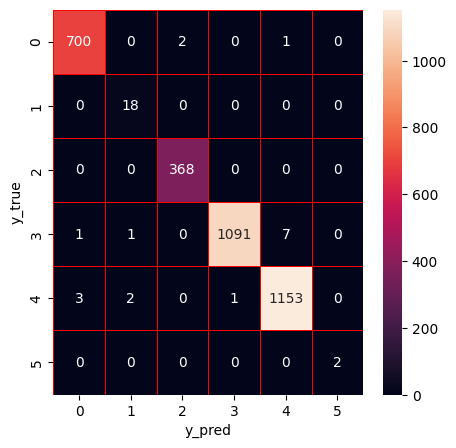

In [ ]:
xg = xgb.XGBClassifier(n_estimators = 10)
xg.fit(X_train,y_train)
xg_score=xg.score(X_test,y_test)
y_predict=xg.predict(X_test)
y_true=y_test
print('Accuracy of XGBoost: '+ str(xg_score))
precision,recall,fscore,none= precision_recall_fscore_support(y_true, y_predict, average='weighted') 
print('Precision of XGBoost: '+(str(precision)))
print('Recall of XGBoost: '+(str(recall)))
print('F1-score of XGBoost: '+(str(fscore)))
print(classification_report(y_true,y_predict))
cm=confusion_matrix(y_true,y_predict)
f,ax=plt.subplots(figsize=(5,5))
sns.heatmap(cm,annot=True,linewidth=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()

In [ ]:
from hyperopt import hp, fmin, tpe, STATUS_OK, Trials
from sklearn.model_selection import cross_val_score, StratifiedKFold
def objective(params):
    params = {
        'n_estimators': int(params['n_estimators']), 
        'max_depth': int(params['max_depth']),
        'learning_rate':  abs(float(params['learning_rate'])),

    }
    clf = xgb.XGBClassifier( **params)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    score = accuracy_score(y_test, y_pred)

    return {'loss':-score, 'status': STATUS_OK }

space = {
    'n_estimators': hp.quniform('n_estimators', 10, 100, 5),
    'max_depth': hp.quniform('max_depth', 4, 100, 1),
    'learning_rate': hp.normal('learning_rate', 0.01, 0.9),
}

best = fmin(fn=objective,
            space=space,
            algo=tpe.suggest,
            max_evals=20)
print("XGBoost: Hyperopt estimated optimum {}".format(best))

100%|██████████| 20/20 [03:23<00:00, 10.18s/trial, best loss: -0.9961194029850746]
XGBoost: Hyperopt estimated optimum {'learning_rate': -0.44190297516959487, 'max_depth': 7.0, 'n_estimators': 45.0}


Accuracy of XGBoost: 0.9955223880597015
Precision of XGBoost: 0.9955445237051496
Recall of XGBoost: 0.9955223880597015
F1-score of XGBoost: 0.9955269012580921
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       703
           1       0.95      1.00      0.97        18
           2       0.99      1.00      1.00       368
           3       1.00      1.00      1.00      1100
           4       0.99      1.00      0.99      1159
           5       1.00      1.00      1.00         2

    accuracy                           1.00      3350
   macro avg       0.99      1.00      0.99      3350
weighted avg       1.00      1.00      1.00      3350



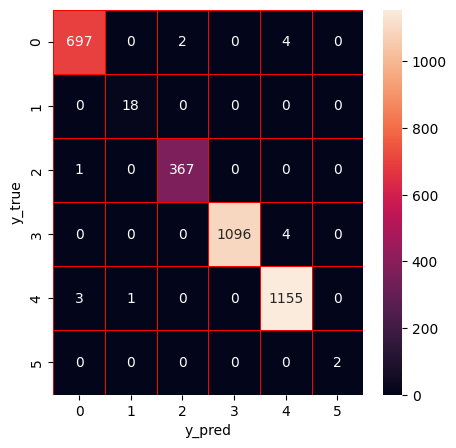

In [ ]:
xg = xgb.XGBClassifier(learning_rate= 0.7340229699980686, n_estimators = 70, max_depth = 14)
xg.fit(X_train,y_train)
xg_score=xg.score(X_test,y_test)
y_predict=xg.predict(X_test)
y_true=y_test
print('Accuracy of XGBoost: '+ str(xg_score))
precision,recall,fscore,none= precision_recall_fscore_support(y_true, y_predict, average='weighted') 
print('Precision of XGBoost: '+(str(precision)))
print('Recall of XGBoost: '+(str(recall)))
print('F1-score of XGBoost: '+(str(fscore)))
print(classification_report(y_true,y_predict))
cm=confusion_matrix(y_true,y_predict)
f,ax=plt.subplots(figsize=(5,5))
sns.heatmap(cm,annot=True,linewidth=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()


In [ ]:
xg_train=xg.predict(X_train)
xg_test=xg.predict(X_test)

Accuracy of RF: 0.9958208955223881
Precision of RF: 0.9958287050569067
Recall of RF: 0.9958208955223881
F1-score of RF: 0.9958177604022175
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       703
           1       1.00      0.94      0.97        18
           2       0.99      1.00      1.00       368
           3       1.00      1.00      1.00      1100
           4       0.99      1.00      1.00      1159
           5       1.00      1.00      1.00         2

    accuracy                           1.00      3350
   macro avg       1.00      0.99      0.99      3350
weighted avg       1.00      1.00      1.00      3350



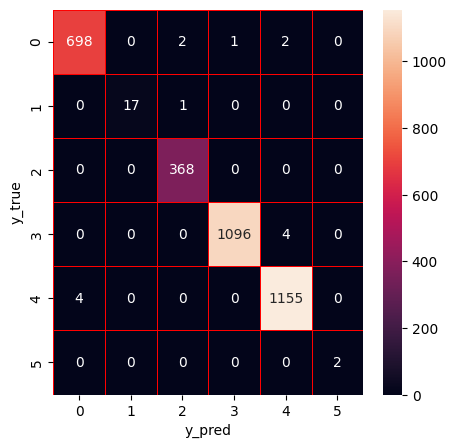

In [ ]:
rf = RandomForestClassifier(random_state = 0)
rf.fit(X_train,y_train) 
rf_score=rf.score(X_test,y_test)
y_predict=rf.predict(X_test)
y_true=y_test
print('Accuracy of RF: '+ str(rf_score))
precision,recall,fscore,none= precision_recall_fscore_support(y_true, y_predict, average='weighted') 
print('Precision of RF: '+(str(precision)))
print('Recall of RF: '+(str(recall)))
print('F1-score of RF: '+(str(fscore)))
print(classification_report(y_true,y_predict))
cm=confusion_matrix(y_true,y_predict)
f,ax=plt.subplots(figsize=(5,5))
sns.heatmap(cm,annot=True,linewidth=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()

In [ ]:
from hyperopt import hp, fmin, tpe, STATUS_OK, Trials
from sklearn.model_selection import cross_val_score, StratifiedKFold
# Define the objective function
def objective(params):
    params = {
        'n_estimators': int(params['n_estimators']), 
        'max_depth': int(params['max_depth']),
        'max_features': int(params['max_features']),
        "min_samples_split":int(params['min_samples_split']),
        "min_samples_leaf":int(params['min_samples_leaf']),
        "criterion":str(params['criterion'])
    }
    clf = RandomForestClassifier( **params)
    clf.fit(X_train,y_train)
    score=clf.score(X_test,y_test)

    return {'loss':-score, 'status': STATUS_OK }
# Define the hyperparameter configuration space
space = {
    'n_estimators': hp.quniform('n_estimators', 10, 200, 1),
    'max_depth': hp.quniform('max_depth', 5, 50, 1),
    "max_features":hp.quniform('max_features', 1, 20, 1),
    "min_samples_split":hp.quniform('min_samples_split',2,11,1),
    "min_samples_leaf":hp.quniform('min_samples_leaf',1,11,1),
    "criterion":hp.choice('criterion',['gini','entropy'])
}

best = fmin(fn=objective,
            space=space,
            algo=tpe.suggest,
            max_evals=20)
print("Random Forest: Hyperopt estimated optimum {}".format(best))

100%|██████████| 20/20 [01:50<00:00,  5.51s/trial, best loss: -0.9958208955223881]
Random Forest: Hyperopt estimated optimum {'criterion': 0, 'max_depth': 25.0, 'max_features': 9.0, 'min_samples_leaf': 2.0, 'min_samples_split': 5.0, 'n_estimators': 22.0}


Accuracy of RF: 0.993731343283582
Precision of RF: 0.9937774243594241
Recall of RF: 0.993731343283582
F1-score of RF: 0.9937446297560425
              precision    recall  f1-score   support

           0       0.99      1.00      0.99       703
           1       0.89      0.94      0.92        18
           2       0.99      1.00      1.00       368
           3       1.00      0.99      0.99      1100
           4       0.99      0.99      0.99      1159
           5       1.00      1.00      1.00         2

    accuracy                           0.99      3350
   macro avg       0.98      0.99      0.98      3350
weighted avg       0.99      0.99      0.99      3350



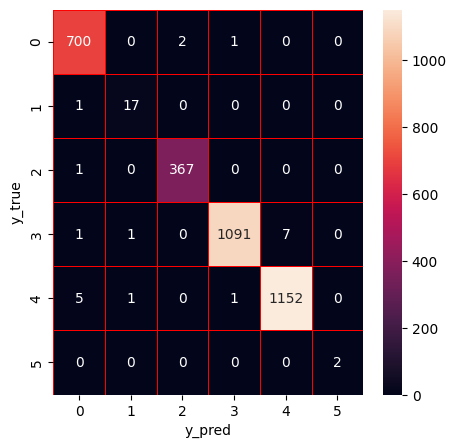

In [ ]:
rf_hpo = RandomForestClassifier(n_estimators = 71, min_samples_leaf = 1, max_depth = 46, min_samples_split = 9, max_features = 20, criterion = 'entropy')
rf_hpo.fit(X_train,y_train)
rf_score=rf_hpo.score(X_test,y_test)
y_predict=rf_hpo.predict(X_test)
y_true=y_test
print('Accuracy of RF: '+ str(rf_score))
precision,recall,fscore,none= precision_recall_fscore_support(y_true, y_predict, average='weighted') 
print('Precision of RF: '+(str(precision)))
print('Recall of RF: '+(str(recall)))
print('F1-score of RF: '+(str(fscore)))
print(classification_report(y_true,y_predict))
cm=confusion_matrix(y_true,y_predict)
f,ax=plt.subplots(figsize=(5,5))
sns.heatmap(cm,annot=True,linewidth=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()

In [ ]:
rf_train=rf_hpo.predict(X_train)
rf_test=rf_hpo.predict(X_test)

Accuracy of DT: 0.9943283582089553
Precision of DT: 0.9943170638704768
Recall of DT: 0.9943283582089553
F1-score of DT: 0.9943175441629073
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       703
           1       0.94      0.89      0.91        18
           2       1.00      0.99      1.00       368
           3       1.00      1.00      1.00      1100
           4       0.99      1.00      0.99      1159
           5       1.00      1.00      1.00         2

    accuracy                           0.99      3350
   macro avg       0.99      0.98      0.98      3350
weighted avg       0.99      0.99      0.99      3350



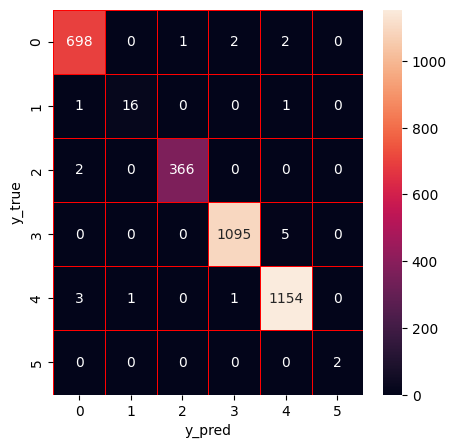

In [ ]:
dt = DecisionTreeClassifier(random_state = 0)
dt.fit(X_train,y_train) 
dt_score=dt.score(X_test,y_test)
y_predict=dt.predict(X_test)
y_true=y_test
print('Accuracy of DT: '+ str(dt_score))
precision,recall,fscore,none= precision_recall_fscore_support(y_true, y_predict, average='weighted') 
print('Precision of DT: '+(str(precision)))
print('Recall of DT: '+(str(recall)))
print('F1-score of DT: '+(str(fscore)))
print(classification_report(y_true,y_predict))
cm=confusion_matrix(y_true,y_predict)
f,ax=plt.subplots(figsize=(5,5))
sns.heatmap(cm,annot=True,linewidth=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()

In [ ]:
from hyperopt import hp, fmin, tpe, STATUS_OK, Trials
from sklearn.model_selection import cross_val_score, StratifiedKFold
# Define the objective function
def objective(params):
    params = {
        'max_depth': int(params['max_depth']),
        'max_features': int(params['max_features']),
        "min_samples_split":int(params['min_samples_split']),
        "min_samples_leaf":int(params['min_samples_leaf']),
        "criterion":str(params['criterion'])
    }
    clf = DecisionTreeClassifier( **params)
    clf.fit(X_train,y_train)
    score=clf.score(X_test,y_test)

    return {'loss':-score, 'status': STATUS_OK }
# Define the hyperparameter configuration space
space = {
    'max_depth': hp.quniform('max_depth', 5, 50, 1),
    "max_features":hp.quniform('max_features', 1, 20, 1),
    "min_samples_split":hp.quniform('min_samples_split',2,11,1),
    "min_samples_leaf":hp.quniform('min_samples_leaf',1,11,1),
    "criterion":hp.choice('criterion',['gini','entropy'])
}

best = fmin(fn=objective,
            space=space,
            algo=tpe.suggest,
            max_evals=50)
print("Decision tree: Hyperopt estimated optimum {}".format(best))

100%|██████████| 50/50 [00:05<00:00,  9.34trial/s, best loss: -0.9949253731343284]
Decision tree: Hyperopt estimated optimum {'criterion': 0, 'max_depth': 24.0, 'max_features': 14.0, 'min_samples_leaf': 3.0, 'min_samples_split': 8.0}


Accuracy of DT: 0.9952238805970149
Precision of DT: 0.9952548398331158
Recall of DT: 0.9952238805970149
F1-score of DT: 0.9952248244220441
              precision    recall  f1-score   support

           0       0.99      1.00      0.99       703
           1       1.00      0.94      0.97        18
           2       1.00      0.99      1.00       368
           3       1.00      0.99      1.00      1100
           4       0.99      1.00      1.00      1159
           5       1.00      1.00      1.00         2

    accuracy                           1.00      3350
   macro avg       1.00      0.99      0.99      3350
weighted avg       1.00      1.00      1.00      3350



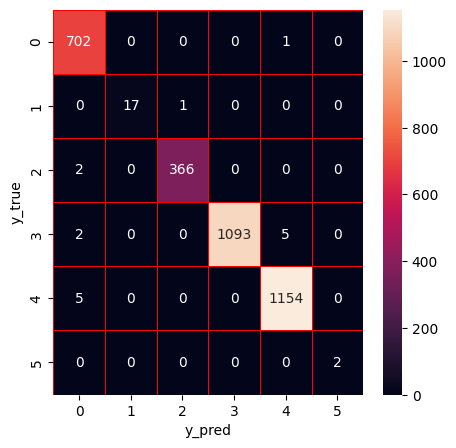

In [ ]:
dt_hpo = DecisionTreeClassifier(min_samples_leaf = 2, max_depth = 47, min_samples_split = 3, max_features = 19, criterion = 'gini')
dt_hpo.fit(X_train,y_train)
dt_score=dt_hpo.score(X_test,y_test)
y_predict=dt_hpo.predict(X_test)
y_true=y_test
print('Accuracy of DT: '+ str(dt_score))
precision,recall,fscore,none= precision_recall_fscore_support(y_true, y_predict, average='weighted') 
print('Precision of DT: '+(str(precision)))
print('Recall of DT: '+(str(recall)))
print('F1-score of DT: '+(str(fscore)))
print(classification_report(y_true,y_predict))
cm=confusion_matrix(y_true,y_predict)
f,ax=plt.subplots(figsize=(5,5))
sns.heatmap(cm,annot=True,linewidth=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()

In [ ]:
dt_train=dt_hpo.predict(X_train)
dt_test=dt_hpo.predict(X_test)

Accuracy of ET: 0.9952238805970149
Precision of ET: 0.9952444989017988
Recall of ET: 0.9952238805970149
F1-score of ET: 0.9952267465605916
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       703
           1       0.95      1.00      0.97        18
           2       0.99      1.00      1.00       368
           3       1.00      1.00      1.00      1100
           4       0.99      1.00      0.99      1159
           5       1.00      1.00      1.00         2

    accuracy                           1.00      3350
   macro avg       0.99      1.00      0.99      3350
weighted avg       1.00      1.00      1.00      3350



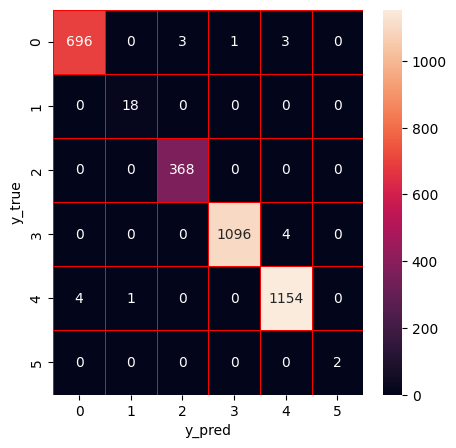

In [ ]:
et = ExtraTreesClassifier(random_state = 0)
et.fit(X_train,y_train) 
et_score=et.score(X_test,y_test)
y_predict=et.predict(X_test)
y_true=y_test
print('Accuracy of ET: '+ str(et_score))
precision,recall,fscore,none= precision_recall_fscore_support(y_true, y_predict, average='weighted') 
print('Precision of ET: '+(str(precision)))
print('Recall of ET: '+(str(recall)))
print('F1-score of ET: '+(str(fscore)))
print(classification_report(y_true,y_predict))
cm=confusion_matrix(y_true,y_predict)
f,ax=plt.subplots(figsize=(5,5))
sns.heatmap(cm,annot=True,linewidth=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()

In [ ]:
from hyperopt import hp, fmin, tpe, STATUS_OK, Trials
from sklearn.model_selection import cross_val_score, StratifiedKFold
# Define the objective function
def objective(params):
    params = {
        'n_estimators': int(params['n_estimators']), 
        'max_depth': int(params['max_depth']),
        'max_features': int(params['max_features']),
        "min_samples_split":int(params['min_samples_split']),
        "min_samples_leaf":int(params['min_samples_leaf']),
        "criterion":str(params['criterion'])
    }
    clf = ExtraTreesClassifier( **params)
    clf.fit(X_train,y_train)
    score=clf.score(X_test,y_test)

    return {'loss':-score, 'status': STATUS_OK }
# Define the hyperparameter configuration space
space = {
    'n_estimators': hp.quniform('n_estimators', 10, 200, 1),
    'max_depth': hp.quniform('max_depth', 5, 50, 1),
    "max_features":hp.quniform('max_features', 1, 20, 1),
    "min_samples_split":hp.quniform('min_samples_split',2,11,1),
    "min_samples_leaf":hp.quniform('min_samples_leaf',1,11,1),
    "criterion":hp.choice('criterion',['gini','entropy'])
}

best = fmin(fn=objective,
            space=space,
            algo=tpe.suggest,
            max_evals=20)
print("Random Forest: Hyperopt estimated optimum {}".format(best))

100%|██████████| 20/20 [00:30<00:00,  1.54s/trial, best loss: -0.9949253731343284]
Random Forest: Hyperopt estimated optimum {'criterion': 0, 'max_depth': 28.0, 'max_features': 14.0, 'min_samples_leaf': 2.0, 'min_samples_split': 3.0, 'n_estimators': 69.0}


Accuracy of ET: 0.9946268656716418
Precision of ET: 0.9946987664897761
Recall of ET: 0.9946268656716418
F1-score of ET: 0.9946443239587425
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       703
           1       0.90      1.00      0.95        18
           2       0.99      1.00      0.99       368
           3       1.00      0.99      1.00      1100
           4       0.99      0.99      0.99      1159
           5       1.00      1.00      1.00         2

    accuracy                           0.99      3350
   macro avg       0.98      1.00      0.99      3350
weighted avg       0.99      0.99      0.99      3350



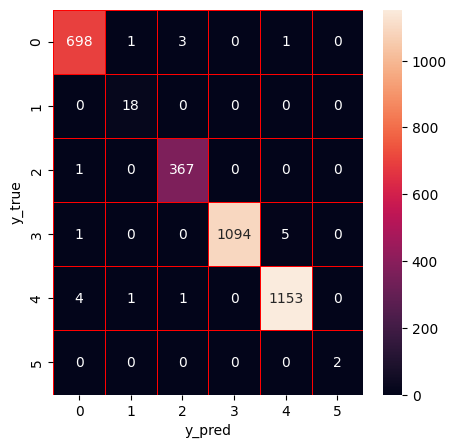

In [ ]:
et_hpo = ExtraTreesClassifier(n_estimators = 53, min_samples_leaf = 1, max_depth = 31, min_samples_split = 5, max_features = 20, criterion = 'entropy')
et_hpo.fit(X_train,y_train) 
et_score=et_hpo.score(X_test,y_test)
y_predict=et_hpo.predict(X_test)
y_true=y_test
print('Accuracy of ET: '+ str(et_score))
precision,recall,fscore,none= precision_recall_fscore_support(y_true, y_predict, average='weighted') 
print('Precision of ET: '+(str(precision)))
print('Recall of ET: '+(str(recall)))
print('F1-score of ET: '+(str(fscore)))
print(classification_report(y_true,y_predict))
cm=confusion_matrix(y_true,y_predict)
f,ax=plt.subplots(figsize=(5,5))
sns.heatmap(cm,annot=True,linewidth=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()

In [ ]:
et_train=et_hpo.predict(X_train)
et_test=et_hpo.predict(X_test)

In [ ]:
base_predictions_train = pd.DataFrame( {
    'DecisionTree': dt_train.ravel(),
        'RandomForest': rf_train.ravel(),
     'ExtraTrees': et_train.ravel(),
     'XgBoost': xg_train.ravel(),
    })
base_predictions_train.head(5)

,DecisionTree,RandomForest,ExtraTrees,XgBoost
0,4,4,4,4
1,3,3,3,3
2,0,0,0,0
3,3,3,3,3
4,0,0,0,0


In [ ]:
dt_train=dt_train.reshape(-1, 1)
et_train=et_train.reshape(-1, 1)
rf_train=rf_train.reshape(-1, 1)
xg_train=xg_train.reshape(-1, 1)
dt_test=dt_test.reshape(-1, 1)
et_test=et_test.reshape(-1, 1)
rf_test=rf_test.reshape(-1, 1)
xg_test=xg_test.reshape(-1, 1)

In [ ]:
dt_train.shape

(22591, 1)

In [ ]:
x_train = np.concatenate(( dt_train, et_train, rf_train, xg_train), axis=1)
x_test = np.concatenate(( dt_test, et_test, rf_test, xg_test), axis=1)

Accuracy of Stacking: 0.9955223880597015
Precision of Stacking: 0.9955445237051496
Recall of Stacking: 0.9955223880597015
F1-score of Stacking: 0.9955269012580921
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       703
           1       0.95      1.00      0.97        18
           2       0.99      1.00      1.00       368
           3       1.00      1.00      1.00      1100
           4       0.99      1.00      0.99      1159
           5       1.00      1.00      1.00         2

    accuracy                           1.00      3350
   macro avg       0.99      1.00      0.99      3350
weighted avg       1.00      1.00      1.00      3350



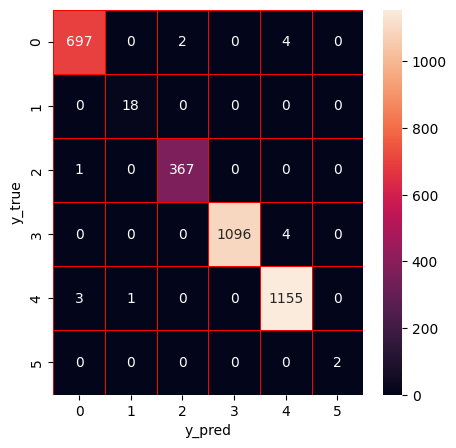

In [ ]:
stk = StackingClassifier(estimators=[('rf',rf),('dt',dt),('et',et)],final_estimator=xg).fit(x_train, y_train)
y_predict=stk.predict(x_test)
y_true=y_test
stk_score=accuracy_score(y_true,y_predict)
print('Accuracy of Stacking: '+ str(stk_score))
precision,recall,fscore,none= precision_recall_fscore_support(y_true, y_predict, average='weighted') 
print('Precision of Stacking: '+(str(precision)))
print('Recall of Stacking: '+(str(recall)))
print('F1-score of Stacking: '+(str(fscore)))
print(classification_report(y_true,y_predict))
cm=confusion_matrix(y_true,y_predict)
f,ax=plt.subplots(figsize=(5,5))
sns.heatmap(cm,annot=True,linewidth=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()

In [ ]:
#(new_output).all()

In [ ]:
from hyperopt import hp, fmin, tpe, STATUS_OK, Trials
from sklearn.model_selection import cross_val_score, StratifiedKFold
def objective(params):
    params = {
        'n_estimators': int(params['n_estimators']), 
        'max_depth': int(params['max_depth']),
        'learning_rate':  abs(float(params['learning_rate'])),

    }
    clf = xgb.XGBClassifier( **params)
    clf.fit(x_train, y_train)
    y_pred = clf.predict(x_test)
    score = accuracy_score(y_test, y_pred)

    return {'loss':-score, 'status': STATUS_OK }

space = {
    'n_estimators': hp.quniform('n_estimators', 10, 100, 5),
    'max_depth': hp.quniform('max_depth', 4, 100, 1),
    'learning_rate': hp.normal('learning_rate', 0.01, 0.9),
}

best = fmin(fn=objective,
            space=space,
            algo=tpe.suggest,
            max_evals=20)
print("XGBoost: Hyperopt estimated optimum {}".format(best))

100%|██████████| 20/20 [00:25<00:00,  1.27s/trial, best loss: -0.9955223880597015]
XGBoost: Hyperopt estimated optimum {'learning_rate': 0.22858655831505642, 'max_depth': 75.0, 'n_estimators': 75.0}


Accuracy of Stacking: 0.9949253731343284
Precision of Stacking: 0.9950563034887854
Recall of Stackingt: 0.9949253731343284
F1-score of Stacking: 0.9949573117675582
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       703
           1       0.86      1.00      0.92        18
           2       0.99      1.00      1.00       368
           3       1.00      1.00      1.00      1100
           4       0.99      1.00      0.99      1159
           5       1.00      1.00      1.00         2

    accuracy                           0.99      3350
   macro avg       0.97      1.00      0.98      3350
weighted avg       1.00      0.99      0.99      3350



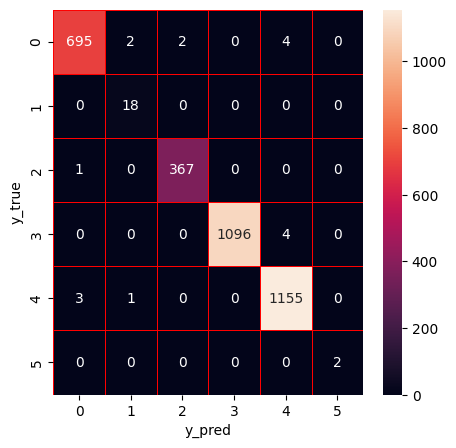

In [ ]:
xg = xgb.XGBClassifier(learning_rate= 0.19229249758051492, n_estimators = 30, max_depth = 36)
xg.fit(x_train,y_train)
xg_score=xg.score(x_test,y_test)
y_predict=xg.predict(x_test)
y_true=y_test
print('Accuracy of Stacking: '+ str(xg_score))
precision,recall,fscore,none= precision_recall_fscore_support(y_true, y_predict, average='weighted') 
print('Precision of Stacking: '+(str(precision)))
print('Recall of Stackingt: '+(str(recall)))
print('F1-score of Stacking: '+(str(fscore)))
print(classification_report(y_true,y_predict))
cm=confusion_matrix(y_true,y_predict)
f,ax=plt.subplots(figsize=(5,5))
sns.heatmap(cm,annot=True,linewidth=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()

In [ ]:
from sklearn import metrics  
print()

print("ACCURACY OF THE MODEL: ", metrics.accuracy_score(y_true,y_predict)*100)


ACCURACY OF THE MODEL:  99.49253731343283


In [ ]:
new_input = x_train

In [ ]:
new_output = stk.predict(new_input)
new_output

array([4, 3, 0, ..., 5, 5, 5])

In [ ]:
new_output
if new_output[0]==[0]:
    print('BENIGN')
elif new_output[0] == [1]:
    print('DOS GOLDENEYE')
elif new_output[0] == [2]:
    print('DOS HULK')
elif new_output[0] == [3]:
    print('DOS SLOWHTTPTEST')
else:
    print('DOS SLOWLORIS')

DOS SLOWLORIS


In [ ]:
# new_input = x_test.values

In [ ]:
 df=pd.read_csv('/content/drive/MyDrive/Intrusion-Detection-System-Using-Machine-Learning-main/data/CICIDS2017_sample_km.csv')

In [ ]:
 df.Label.value_counts()

4    5796
3    5499
0    3512
2    1840
1      90
5      11
Name: Label, dtype: int64

In [ ]:
 df1 = df[df['Label'] != 4]
 df1['Label'][df1['Label'] > 0] = 1
 df1.to_csv('/content/drive/MyDrive/Intrusion-Detection-System-Using-Machine-Learning-main/data/CICIDS2017_sample_km_without_portscan.csv',index=0)

In [ ]:
 df2 = df[df['Label'] == 4]
 df2['Label'][df2['Label'] == 4] = 1
 df2.to_csv('/content/drive/MyDrive/Intrusion-Detection-System-Using-Machine-Learning-main/data/CICIDS2017_sample_km_portscan.csv',index=0)

In [ ]:
df1 = pd.read_csv('/content/drive/MyDrive/Intrusion-Detection-System-Using-Machine-Learning-main/data/CICIDS2017_sample_km_without_portscan.csv')
df2 = pd.read_csv('/content/drive/MyDrive/Intrusion-Detection-System-Using-Machine-Learning-main/data/CICIDS2017_sample_km_portscan.csv')

In [ ]:
features = df1.drop(['Label'],axis=1).dtypes[df1.dtypes != 'object'].index
df1[features] = df1[features].apply(
    lambda x: (x - x.mean()) / (x.std()))
df2[features] = df2[features].apply(
    lambda x: (x - x.mean()) / (x.std()))
df1 = df1.fillna(0)
df2 = df2.fillna(0)

In [ ]:
df1.Label.value_counts()

1    7440
0    3512
Name: Label, dtype: int64

In [ ]:
df2.Label.value_counts()

1    5796
Name: Label, dtype: int64

In [ ]:
df2p=df1[df1['Label']==0]
df2pp=df2p.sample(n=None, frac=5796/7435, replace=False, weights=None, random_state=None, axis=0)
df2=pd.concat([df2, df2pp])

In [ ]:
df2.Label.value_counts()

1    5796
0    2738
Name: Label, dtype: int64

In [ ]:
df = df1.append(df2)

In [ ]:
X = df.drop(['Label'],axis=1) .values
y = df.iloc[:, -1].values.reshape(-1,1)
y=y.astype('int')
y=np.ravel(y)
pd.Series(y).value_counts()

1    13236
0     6250
dtype: int64

In [ ]:
from sklearn.feature_selection import mutual_info_classif
importances = mutual_info_classif(X, y)

In [ ]:
f_list = sorted(zip(map(lambda x: round(x, 4), importances), features), reverse=True)
Sum = 0
fs = []
for i in range(0, len(f_list)):
    Sum = Sum + f_list[i][0]
    fs.append(f_list[i][1])

In [ ]:
f_list2 = sorted(zip(map(lambda x: round(x, 4), importances/Sum), features), reverse=True)
Sum2 = 0
fs = []
for i in range(0, len(f_list2)):
    Sum2 = Sum2 + f_list2[i][0]
    fs.append(f_list2[i][1])
    if Sum2>=0.9:
        break  

In [ ]:
X_fs = df[fs].values

In [ ]:
X_fs.shape

(19486, 54)

In [ ]:
X_fs

array([[-0.24840843, -0.47279798, -0.93157094, ..., -1.61714723,
         0.92738315, -0.43035586],
       [-0.24840843, -0.47617537, -0.93157094, ..., -1.61714723,
         0.92738315, -0.43035586],
       [-0.24840843, -0.47424543, -0.93157094, ..., -1.61714723,
         0.92738315, -0.43035586],
       ...,
       [-0.24840843, -0.42406712, -0.93157094, ...,  0.08512392,
         0.92738315, -0.43035586],
       [ 3.45222154, -0.49113237, -0.92344813, ...,  0.08512392,
        -0.59971056, -0.43035586],
       [-0.24840843, -0.44529641, -0.93157094, ..., -1.61714723,
         0.92738315, -0.37910521]])

In [ ]:
from FCBF_module import FCBF, FCBFK, FCBFiP, get_i
fcbf = FCBFK(k = 20)
#fcbf.fit(X_fs, y)

In [ ]:
X_fss = fcbf.fit_transform(X_fs,y)

In [ ]:
X_fss.shape

(19486, 20)

In [ ]:
X_fss

array([[-0.24840843, -0.93157094,  0.2853731 , ..., -0.22313351,
        -0.04804264, -0.04804264],
       [-0.24840843, -0.93157094,  0.23307759, ..., -0.22313351,
        -0.04804264, -0.04804264],
       [-0.24840843, -0.93157094,  0.30280493, ..., -0.22313351,
        -0.04804264, -0.04804264],
       ...,
       [-0.24840843, -0.93157094,  0.44225962, ..., -0.22313351,
        -0.0631397 , -0.0631397 ],
       [ 3.45222154, -0.92344813, -0.28987749, ..., -0.22298757,
        -0.0631397 , -0.0631397 ],
       [-0.24840843, -0.93157094,  0.54685064, ..., -0.22313351,
        -0.04804264, -0.04804264]])

In [ ]:
from sklearn.decomposition import KernelPCA
kpca = KernelPCA(n_components = 4, kernel = 'rbf')
kpca.fit(X_fss, y)
X_kpca = kpca.transform(X_fss)


In [ ]:
X_train = X_kpca[:len(df1)]
y_train = y[:len(df1)]
X_test = X_kpca[len(df1):]
y_test = y[len(df1):]

In [ ]:
pd.Series(y_train).value_counts()


1    7440
0    3512
dtype: int64

In [ ]:
from imblearn.over_sampling import SMOTE
smote=SMOTE(n_jobs=-1,sampling_strategy={0:11389})
X_train, y_train = smote.fit_resample(X_train, y_train)

In [ ]:
pd.Series(y_train).value_counts()

0    11389
1     7440
dtype: int64

In [ ]:
pd.Series(y_test).value_counts()

1    5796
0    2738
dtype: int64

In [ ]:
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN,MeanShift
from sklearn.cluster import SpectralClustering,AgglomerativeClustering,AffinityPropagation,Birch,MiniBatchKMeans,MeanShift 
from sklearn.mixture import GaussianMixture, BayesianGaussianMixture
from sklearn.metrics import classification_report
from sklearn import metrics

In [ ]:
def CL_kmeans(X_train, X_test, y_train, y_test,n,b=100):
    km_cluster = MiniBatchKMeans(n_clusters=n,batch_size=b)
    result = km_cluster.fit_predict(X_train)
    result2 = km_cluster.predict(X_test)

    count=0
    a=np.zeros(n)
    b=np.zeros(n)
    for v in range(0,n):
        for i in range(0,len(y_train)):
            if result[i]==v:
                if y_train[i]==1:
                    a[v]=a[v]+1
                else:
                    b[v]=b[v]+1
    list1=[]
    list2=[]
    for v in range(0,n):
        if a[v]<=b[v]:
            list1.append(v)
        else: 
            list2.append(v)
    for v in range(0,len(y_test)):
        if result2[v] in list1:
            result2[v]=0
        elif result2[v] in list2:
            result2[v]=1
        else:
            print("-1")
    print(classification_report(y_test, result2))
    cm=confusion_matrix(y_test,result2)
    acc=metrics.accuracy_score(y_test,result2)
    print(str(acc))
    print(cm)

In [ ]:
CL_kmeans(X_train, X_test, y_train, y_test, 8)

              precision    recall  f1-score   support

           0       0.47      0.97      0.63      2738
           1       0.97      0.48      0.64      5796

    accuracy                           0.64      8534
   macro avg       0.72      0.73      0.64      8534
weighted avg       0.81      0.64      0.64      8534

0.637098664166862
[[2662   76]
 [3021 2775]]


In [ ]:
!pip install git+https://github.com/scikit-optimize/scikit-optimize.git

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/scikit-optimize/scikit-optimize.git to /tmp/pip-req-build-_iwf1uk1
  Running command git clone --filter=blob:none --quiet https://github.com/scikit-optimize/scikit-optimize.git /tmp/pip-req-build-_iwf1uk1
  Resolved https://github.com/scikit-optimize/scikit-optimize.git to commit a2369ddbc332d16d8ff173b12404b03fea472492
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done


In [ ]:
from skopt.space import Real, Integer
from skopt.utils import use_named_args
from sklearn import metrics

space  = [Integer(2, 50, name='n_clusters')]
@use_named_args(space)
def objective(**params):
    km_cluster = MiniBatchKMeans(batch_size=100, **params)
    n=params['n_clusters']
    
    result = km_cluster.fit_predict(X_train)
    result2 = km_cluster.predict(X_test)

    count=0
    a=np.zeros(n)
    b=np.zeros(n)
    for v in range(0,n):
        for i in range(0,len(y_train)):
            if result[i]==v:
                if y_train[i]==1:
                    a[v]=a[v]+1
                else:
                    b[v]=b[v]+1
    list1=[]
    list2=[]
    for v in range(0,n):
        if a[v]<=b[v]:
            list1.append(v)
        else: 
            list2.append(v)
    for v in range(0,len(y_test)):
        if result2[v] in list1:
            result2[v]=0
        elif result2[v] in list2:
            result2[v]=1
        else:
            print("-1")
    cm=metrics.accuracy_score(y_test,result2)
    print(str(n)+" "+str(cm))
    return (1-cm)
from skopt import gp_minimize
import time
t1=time.time()
res_gp = gp_minimize(objective, space, n_calls=20, random_state=0)
t2=time.time()
print(t2-t1)
print("Best score=%.4f" % (1-res_gp.fun))
print("""Best parameters: n_clusters=%d""" % (res_gp.x[0]))

30 0.7072884930864776
43 0.31251464729318024
43 0.6386219826576048
43 0.711506913522381
32 0.5332786501054605
20 0.5427700960862433
16 0.5324584016873681
5 0.8391141317084603
15 0.5318725099601593
25 0.37790016404968363
5 0.824935551910007
5 0.6399109444574642
4 0.8247011952191236
2 0.7083430981954535
2 0.8112256854933209
2 0.7078743848136865
2 0.8106397937661121
2 0.7091633466135459
2 0.7098664166861964
7 0.6245605812045933
44.400559425354004
Best score=0.8391
Best parameters: n_clusters=5


In [ ]:
#Hyperparameter optimization by BO-TPE
from hyperopt import hp, fmin, tpe, STATUS_OK, Trials
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.cluster import MiniBatchKMeans
from sklearn import metrics

def objective(params):
    params = {
        'n_clusters': int(params['n_clusters']), 
    }
    km_cluster = MiniBatchKMeans(batch_size=100, **params)
    n=params['n_clusters']
    
    result = km_cluster.fit_predict(X_train)
    result2 = km_cluster.predict(X_test)

    count=0
    a=np.zeros(n)
    b=np.zeros(n)
    for v in range(0,n):
        for i in range(0,len(y_train)):
            if result[i]==v:
                if y_train[i]==1:
                    a[v]=a[v]+1
                else:
                    b[v]=b[v]+1
    list1=[]
    list2=[]
    for v in range(0,n):
        if a[v]<=b[v]:
            list1.append(v)
        else: 
            list2.append(v)
    for v in range(0,len(y_test)):
        if result2[v] in list1:
            result2[v]=0
        elif result2[v] in list2:
            result2[v]=1
        else:
            print("-1")
    score=metrics.accuracy_score(y_test,result2)
    print(str(params['n_clusters'])+" "+str(score))
    return {'loss':1-score, 'status': STATUS_OK }
space = {
    'n_clusters': hp.quniform('n_clusters', 2, 50, 1),
}

best = fmin(fn=objective,
            space=space,
            algo=tpe.suggest,
            max_evals=20)
print("Random Forest: Hyperopt estimated optimum {}".format(best))

45 0.3016170611670963
34 0.7153737989219592
15 0.5247246308882119
16 0.8449730489805484
25 0.4998828216545582
4 0.824935551910007
31 0.4963674712913054
17 0.64893367705648
44 0.49484415280056243
43 0.5043355987813453
16 0.5255448793063042
18 0.7275603468479025
27 0.521209280524959
11 0.5064448089992969
23 0.5278884462151394
27 0.48242324818373566
22 0.7321303023201312
14 0.8382938832903679
10 0.630653855167565
45 0.5208577454886337
100%|██████████| 20/20 [00:52<00:00,  2.63s/trial, best loss: 0.15502695101945163]
Random Forest: Hyperopt estimated optimum {'n_clusters': 16.0}


In [ ]:
CL_kmeans(X_train, X_test, y_train, y_test, 4)

              precision    recall  f1-score   support

           0       0.66      0.93      0.77      2738
           1       0.96      0.77      0.86      5796

    accuracy                           0.83      8534
   macro avg       0.81      0.85      0.82      8534
weighted avg       0.86      0.83      0.83      8534

0.8251699086008906
[[2554  184]
 [1308 4488]]


In [ ]:
def Anomaly_IDS(X_train, X_test, y_train, y_test,n,b=100):
    # CL-kmeans
    km_cluster = MiniBatchKMeans(n_clusters=n,batch_size=b)
    result = km_cluster.fit_predict(X_train)
    result2 = km_cluster.predict(X_test)

    count=0
    a=np.zeros(n)
    b=np.zeros(n)
    for v in range(0,n):
        for i in range(0,len(y_train)):
            if result[i]==v:
                if y_train[i]==1:
                    a[v]=a[v]+1
                else:
                    b[v]=b[v]+1
    list1=[]
    list2=[]
    for v in range(0,n):
        if a[v]<=b[v]:
            list1.append(v)
        else: 
            list2.append(v)
    for v in range(0,len(y_test)):
        if result2[v] in list1:
            result2[v]=0
        elif result2[v] in list2:
            result2[v]=1
        else:
            print("-1")
    # print(classification_report(y_test, result2))
    cm=confusion_matrix(y_test,result2)
    acc=metrics.accuracy_score(y_test,result2)
    # print(str(acc))
    # print(cm)
    return result2

    

In [ ]:
new_input = X_test

In [ ]:
new_output = (Anomaly_IDS(X_train, X_test, y_train, y_test,10,b=100))

In [ ]:
new_output
if new_output[1]==[0]:
    print('BENIGN')
elif new_output[1] == [1]:
    print('DOS GOLDENEYE')
elif new_output[1] == [2]:
    print('DOS HULK')
elif new_output[1] == [3]:
    print('DOS SLOWHTTPTEST')
else:
    print('DOS SLOWLORIS')

DOS GOLDENEYE


In [ ]:
new_output1 = stk.predict(new_input)

In [ ]:
new_output
if new_output[0]==[0]:
    print('Normal')
elif new_output[0] == [1]:
    print('Unknown attack')

Unknown attack
